## 데이터 분석의 목적
- 각 지역별 소비량을 늘릴 수 있는 방안을 탐색
- 각 지역별로 어떠한 여행코스를 추천해주면 좋을지 탐색

## 1. 지역별 여행 검색량 / 소비량 비교
- 배경 : 검색량이 많음에도 불구하고 소비량이 적은 곳 or 검색량이 적어도 소비량이 많은 곳을 알아보고 그 원인을 분석해보기 위함

In [2]:
import pandas as pd

In [3]:
pd_attract = pd.read_csv('../data/data_attraction.csv')
pd_consume = pd.read_csv('../data/data_consume.csv')

In [4]:
pd_attract.head()

,_id,rank,attraction_name,address,classification,attraction_search,region,std_year
0,65e91282bb908e26c8038353,1,속초관광수산시장,강원 속초시 중앙로147번길 16-0,시장,644655,강원,2020
1,65e91282bb908e26c8038354,2,속초해변,강원 속초시 해오름로 186-0,자연경관(하천/해양),276727,강원,2020
2,65e91282bb908e26c8038355,3,경포해변,강원 강릉시,자연경관(하천/해양),263395,강원,2020
3,65e91282bb908e26c8038356,4,주문진항,강원 강릉시 해안로 1758-14,자연경관(하천/해양),215243,강원,2020
4,65e91282bb908e26c8038357,5,쏠비치삼척,강원 삼척시 수로부인길 453-0,콘도미니엄,204957,강원,2020


In [5]:
pd_attract['region'].value_counts()

region
강원    800
세종    800
충남    800
제주    800
전북    800
전남    800
인천    800
울산    800
서울    800
경기    800
부산    800
대전    800
대구    800
광주    800
경북    800
경남    800
충북    800
Name: count, dtype: int64

In [6]:
total_search_region = pd_attract.groupby('region')['attraction_search'].sum()

In [7]:
total_search_region.sort_values(ascending=False)
# 경기 > 서울 > 인천 > 강원 > 부산 > 제주 > 충남 > 경북 > 경남 > 충북 > 전남 > 대구 > 전북 > 대전 > 울산 > 광주 > 세종

region
경기    103530347
서울     84305657
인천     45222405
강원     44630768
부산     35671964
제주     27869314
충남     27341552
경북     23736682
경남     21867415
충북     20522432
전남     19871242
대구     17619046
전북     16522175
대전     16038903
울산     10301660
광주      9147267
세종      6835117
Name: attraction_search, dtype: int64

In [8]:
import matplotlib.pyplot as plt
import matplotlib as mpl

In [9]:
mpl.rc('font', family='NanumBarunGothic')

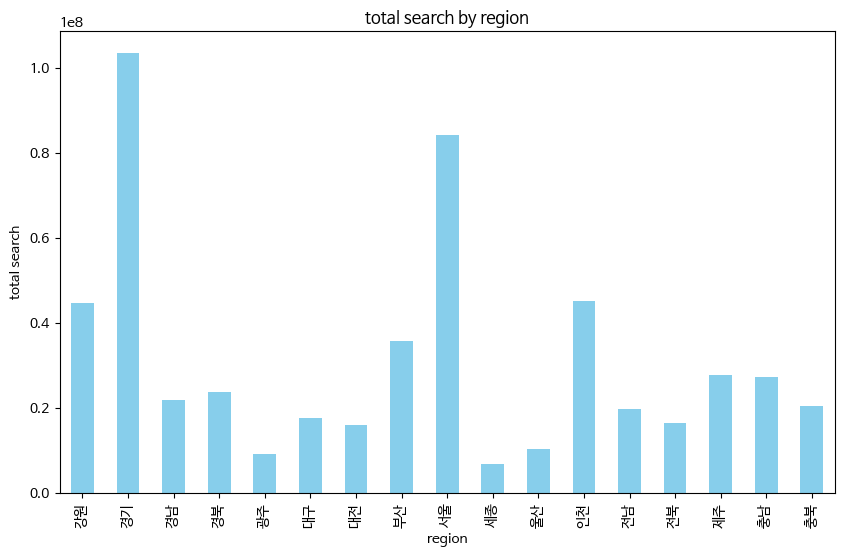

In [10]:
plt.figure(figsize=(10,6))
total_search_region.plot(kind='bar', color='skyblue')
plt.title('total search by region')
plt.xlabel('region')
plt.ylabel('total search')
plt.show()

In [11]:
pd_consume.head()

,_id,std_year,region,consumption_amount,industry_major_cate,industry_middle_cate
0,65e912c3bb908e26c803dea3,2020,강원,2.870202e+06,쇼핑업,관광기념품
1,65e912c3bb908e26c803dea4,2020,강원,8.180715e+07,쇼핑업,레저용품쇼핑
2,65e912c3bb908e26c803dea5,2020,강원,8.001180e+07,쇼핑업,대형쇼핑몰
3,65e912c3bb908e26c803dea6,2020,강원,6.250369e+04,쇼핑업,면세점
4,65e912c3bb908e26c803dea7,2020,강원,2.938260e+07,숙박업,호텔


In [12]:
total_consume_region = pd_consume.groupby('region')['consumption_amount'].sum()
total_consume_region

region
강원    4.908100e+09
경기    3.491471e+10
경남    5.771857e+09
경북    4.654284e+09
광주    3.537131e+09
대구    6.567972e+09
대전    5.160175e+09
부산    1.116251e+10
서울    4.292003e+10
세종    3.842250e+08
울산    2.078381e+09
인천    6.640479e+09
전남    3.577528e+09
전북    2.984366e+09
제주    4.159169e+09
충남    4.375691e+09
충북    3.885181e+09
Name: consumption_amount, dtype: float64

###  소비량과 검색량을 지역별로 표현

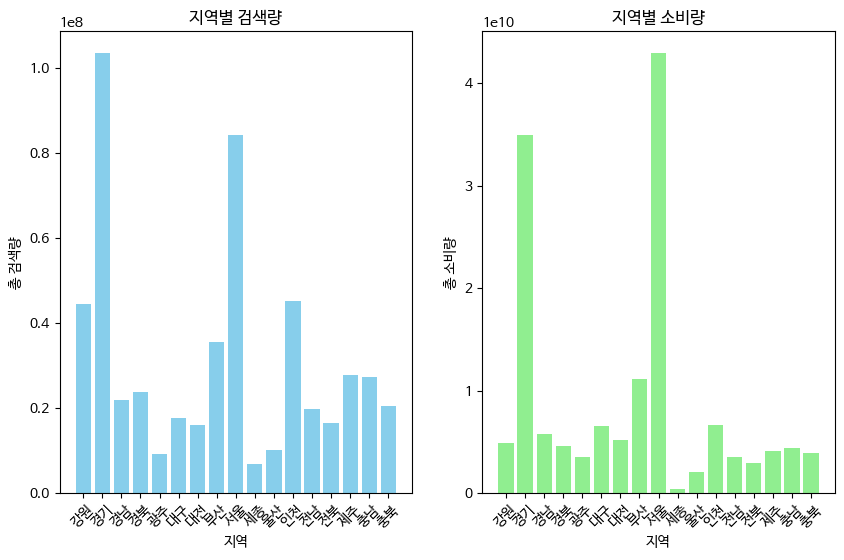

In [13]:
fig, axes = plt.subplots(1,2,figsize=(10,6))
axes[0].bar(total_search_region.index, total_search_region, color='skyblue')
axes[0].set_title('지역별 검색량')
axes[0].set_xlabel('지역')
axes[0].set_ylabel('총 검색량')
axes[0].tick_params(axis='x', rotation=45)
axes[1].bar(total_consume_region.index, total_consume_region, color='lightgreen')
axes[1].set_title('지역별 소비량')
axes[1].set_xlabel('지역')
axes[1].set_ylabel('총 소비량')
axes[1].tick_params(axis='x', rotation=45)

- 이제 두 그래프를 합쳐보자

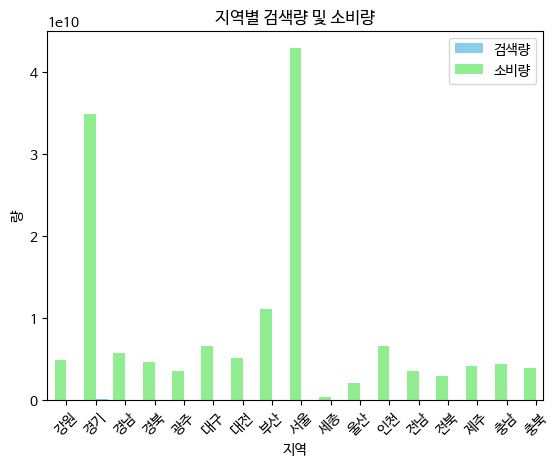

In [14]:
fig, ax = plt.subplots(figure=(10,6))
total_search_region.plot(kind='bar', ax=ax, color='skyblue', position=0, width=0.4)
total_consume_region.plot(kind='bar', ax=ax, color='lightgreen', position=1, width=0.4)
ax.set_title('지역별 검색량 및 소비량')
ax.set_xlabel('지역')
ax.set_ylabel('량')
ax.legend(['검색량', '소비량'])
plt.xticks(rotation=45)
plt.show()

- 생각해보니 검색량과 소비량은 단위가 다름 -> 단위 맞춰주기

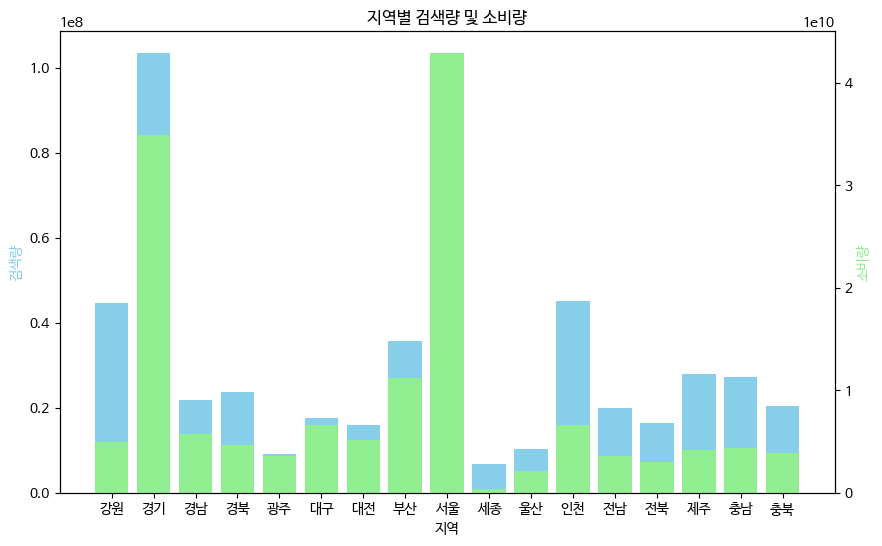

In [15]:
fig, axis1 = plt.subplots(figsize=(10,6))
axis1.bar(total_search_region.index, total_search_region, color='skyblue')
axis1.set_xlabel('지역')
axis1.set_ylabel('검색량', color ='skyblue')

axis2 = axis1.twinx()
axis2.bar(total_consume_region.index, total_consume_region, color='lightgreen')
axis2.set_xlabel('지역')
axis2.set_ylabel('소비량', color='lightgreen')

plt.title('지역별 검색량 및 소비량')
plt.xticks(rotation=45)
plt.show()

In [16]:
# 검색량 대비 소비량의 퍼센테이지를 구함
df = pd.DataFrame({'Region':total_search_region.index,'검색량' : total_search_region, '소비량' : total_consume_region})
df['소비량/검색량'] = (df['소비량']/df['검색량'])/10
df

,Region,검색량,소비량,소비량/검색량
region,,,,
강원,강원,44630768,4.908100e+09,10.997123
경기,경기,103530347,3.491471e+10,33.724135
경남,경남,21867415,5.771857e+09,26.394786
경북,경북,23736682,4.654284e+09,19.607979
광주,광주,9147267,3.537131e+09,38.668714
대구,대구,17619046,6.567972e+09,37.277685
대전,대전,16038903,5.160175e+09,32.172868
부산,부산,35671964,1.116251e+10,31.292123
서울,서울,84305657,4.292003e+10,50.910020


In [17]:
df.sort_values(by='소비량/검색량')

,Region,검색량,소비량,소비량/검색량
region,,,,
세종,세종,6835117,3.842250e+08,5.621338
강원,강원,44630768,4.908100e+09,10.997123
인천,인천,45222405,6.640479e+09,14.684046
제주,제주,27869314,4.159169e+09,14.923829
충남,충남,27341552,4.375691e+09,16.003815
전남,전남,19871242,3.577528e+09,18.003543
전북,전북,16522175,2.984366e+09,18.062790
충북,충북,20522432,3.885181e+09,18.931387
경북,경북,23736682,4.654284e+09,19.607979


/tmp/ipykernel_34/1124318504.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(df['Region'][i], txt, f'{txt:.1f}', ha='center', va='bottom')


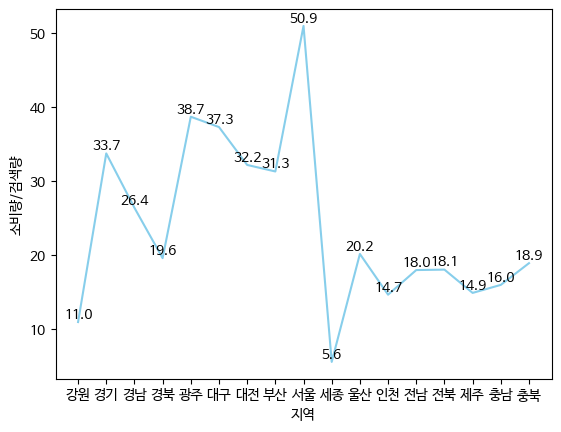

In [18]:
plt.plot(df['Region'], df['소비량/검색량'], color='skyblue', label='소비량/검색량(/10)')
plt.xlabel('지역')
plt.ylabel('소비량/검색량')
for i, txt in enumerate(df['소비량/검색량']):
    plt.text(df['Region'][i], txt, f'{txt:.1f}', ha='center', va='bottom')
plt.show()

- 검색량 대비 소비량이 적은 순 : 세종 < 강원 < 인천 < 제주 < 충남 < 전남 < 전북 < 충북 < 경북 < 울산 < 경남 < 부산 < 대전 < 경기 < 대구 < 광주 < 서울
- 검색량 큰 순 : 경기 > 서울 > 인천 > 강원 > 부산 > 제주 > 충남 > 경북 > 경남 > 충북 > 전남 > 대구 > 전북 > 대전 > 울산 > 광주 > 세종
- 검색량이 큰 지역 중 검색량과 소비량의 차이가 상대적으로 큰 지역 : 강원, 인천
- 검색량이 적은 지역 중 검색량과 소비량의 차이가 적은 지역 : 광주, 대구, 대전
- 검색량이 적은 지역 중 검색량과 소비량의 차이가 큰 지역 : 세종, 울산, 전북, 전남

## 2. 검색량 대비 소비량이 적은 지역 대상 : 강원, 인천
- 강원, 인천의 공통점 : 서울과 비교적 가까운 곳에 위치함
- 가설0 : 각 지역에서 소비하게 되는 컨텐츠가 한정적임
- 가설1 : 가까운 곳에 위치한 여행지는 가볍게 검색하는 경우가 많음
- 가설2 : 서울로 여행을 오는 사람들이 서울 근교 여행으로 검색하지만 실제로는 서울에서 많이 시간을 보낼 것임
- 가설3 : 가까운 곳으로 가는 이들은 가성비 여행을 생각할 수 있음

### 가설0 : 각 지역에서 소비하게 되는 컨텐츠가 한정적임

In [19]:
df_trend = pd.read_csv('../data/data_trend_search.csv')
df_trend.head()

,_id,region,std_year_month,std_year,std_month,tour_trend,num_mention
0,65e92ddfbb908e26c804393d,강원,202007,2020,7,레포츠,58868
1,65e92ddfbb908e26c804393e,강원,202008,2020,8,레포츠,53624
2,65e92ddfbb908e26c804393f,강원,202006,2020,6,레포츠,49214
3,65e92ddfbb908e26c8043940,강원,202010,2020,10,레포츠,47223
4,65e92ddfbb908e26c8043941,강원,202007,2020,7,휴식/힐링,40740


In [20]:
total_mention_trend_region = df_trend.groupby(['region', 'tour_trend'])['num_mention'].sum()
print(total_mention_trend_region)

region  tour_trend
강원      기타             381401
        레포츠           2076932
        미식             143258
        체험             150178
        휴식/힐링         1536602
                       ...   
충북      기타              98865
        레포츠            549512
        미식              33200
        체험              54491
        휴식/힐링          458327
Name: num_mention, Length: 85, dtype: int64


In [21]:
df_total_mention_trend_region = total_mention_trend_region.reset_index()
df_total_mention_trend_region.columns = ['Region', 'Tour_trend', 'Num_mention']

In [22]:
table_trend_mention = pd.pivot_table(df_total_mention_trend_region, index=['Region', 'Tour_trend','Num_mention'], fill_value=0)
table_trend_mention

Empty DataFrame
Columns: []
Index: [(강원, 기타, 381401), (강원, 레포츠, 2076932), (강원, 미식, 143258), (강원, 체험, 150178), (강원, 휴식/힐링, 1536602), (경기, 기타, 892662), (경기, 레포츠, 2859760), (경기, 미식, 323824), (경기, 체험, 268949), (경기, 휴식/힐링, 3067835), (경남, 기타, 263872), (경남, 레포츠, 1240446), (경남, 미식, 68892), (경남, 체험, 144915), (경남, 휴식/힐링, 1011963), (경북, 기타, 241495), (경북, 레포츠, 929053), (경북, 미식, 68239), (경북, 체험, 175902), (경북, 휴식/힐링, 927543), (광주, 기타, 61484), (광주, 레포츠, 130115), (광주, 미식, 28230), (광주, 체험, 15595), (광주, 휴식/힐링, 186124), (대구, 기타, 160608), (대구, 레포츠, 328314), (대구, 미식, 93149), (대구, 체험, 31830), (대구, 휴식/힐링, 451988), (대전, 기타, 89105), (대전, 레포츠, 173323), (대전, 미식, 51324), (대전, 체험, 21121), (대전, 휴식/힐링, 251217), (부산, 기타, 1405576), (부산, 레포츠, 997611), (부산, 미식, 282846), (부산, 체험, 98049), (부산, 휴식/힐링, 1448127), (서울, 기타, 1381371), (서울, 레포츠, 2011121), (서울, 미식, 586194), (서울, 체험, 166170), (서울, 휴식/힐링, 3052183), (세종, 기타, 12000), (세종, 레포츠, 26989), (세종, 미식, 4362), (세종, 체험, 5321), (세종, 휴식/힐링, 45357), (울산, 기타, 54161), (울산, 레포츠, 192788), (울산, 미식, 25139), (울산, 체험, 22414), (울산, 휴식/힐링, 207413), (인천, 기타, 252819), (인천, 레포츠, 559665), (인천, 미식, 92843), (인천, 체험, 70150), (인천, 휴식/힐링, 669954), (전남, 기타, 243456), (전남, 레포츠, 807478), (전남, 미식, 63382), (전남, 체험, 153870), (전남, 휴식/힐링, 857584), (전북, 기타, 146769), (전북, 레포츠, 485321), (전북, 미식, 43290), (전북, 체험, 103524), (전북, 휴식/힐링, 489514), (제주, 기타, 2000856), (제주, 레포츠, 703656), (제주, 미식, 122878), (제주, 체험, 208563), (제주, 휴식/힐링, 1024050), (충남, 기타, 152850), (충남, 레포츠, 713828), (충남, 미식, 64115), (충남, 체험, 124322), (충남, 휴식/힐링, 684484), (충북, 기타, 98865), (충북, 레포츠, 549512), (충북, 미식, 33200), (충북, 체험, 54491), (충북, 휴식/힐링, 458327)]

[85 rows x 0 columns]

In [23]:
pivot_table = df_total_mention_trend_region.pivot_table(index='Region', columns='Tour_trend', values='Num_mention', fill_value=0)
print(pivot_table)

Tour_trend         기타        레포츠        미식        체험      휴식/힐링
Region                                                         
강원           381401.0  2076932.0  143258.0  150178.0  1536602.0
경기           892662.0  2859760.0  323824.0  268949.0  3067835.0
경남           263872.0  1240446.0   68892.0  144915.0  1011963.0
경북           241495.0   929053.0   68239.0  175902.0   927543.0
광주            61484.0   130115.0   28230.0   15595.0   186124.0
대구           160608.0   328314.0   93149.0   31830.0   451988.0
대전            89105.0   173323.0   51324.0   21121.0   251217.0
부산          1405576.0   997611.0  282846.0   98049.0  1448127.0
서울          1381371.0  2011121.0  586194.0  166170.0  3052183.0
세종            12000.0    26989.0    4362.0    5321.0    45357.0
울산            54161.0   192788.0   25139.0   22414.0   207413.0
인천           252819.0   559665.0   92843.0   70150.0   669954.0
전남           243456.0   807478.0   63382.0  153870.0   857584.0
전북           146769.0   485321.0   43290

<Figure size 1000x600 with 0 Axes>

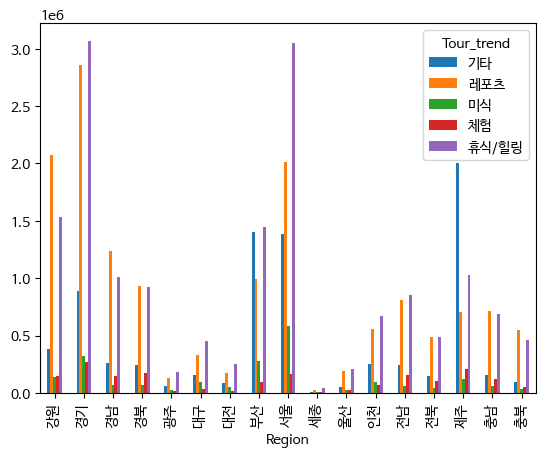

In [24]:
plt.figure(figsize=(10,6))
pivot_table.plot(kind='bar')
plt.show()

In [25]:
regions = df_total_mention_trend_region['Region'].unique()

In [26]:
plt.figure(figsize=(15,5))

<Figure size 1500x500 with 0 Axes>

<Figure size 1500x500 with 0 Axes>

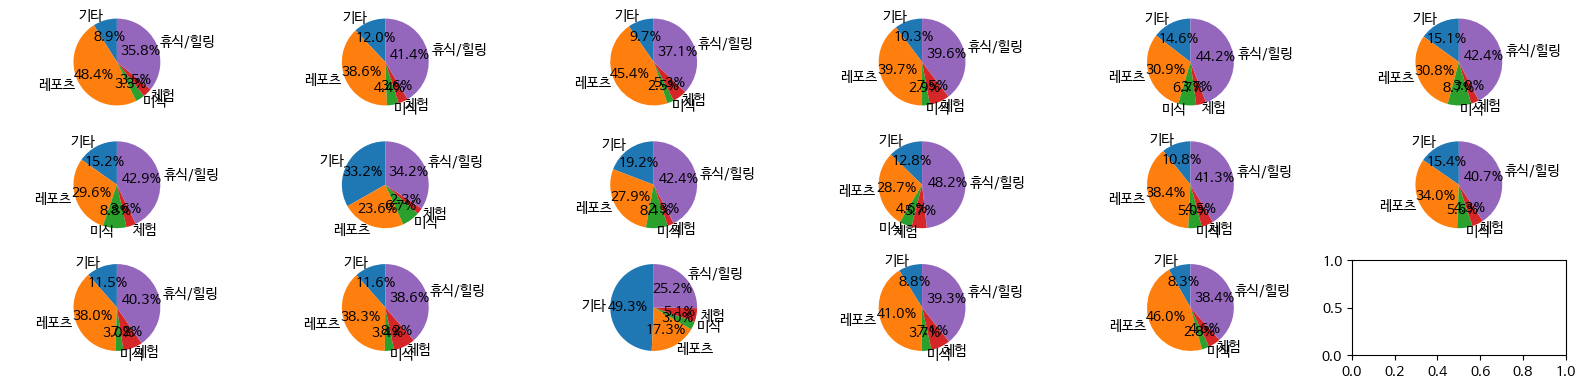

In [36]:
# 주어진 데이터프레임에서 지역별로 그룹화
grouped_data = df_total_mention_trend_region.groupby('Region')

# 5x4 격자 형태로 배치할 서브플롯 생성
num_rows = 3
num_cols = 6
fig, axes = plt.subplots(num_rows, num_cols, figsize=(16, 4))

# 지역별로 그룹화된 데이터프레임을 순회하면서 원그래프 그리기
for i, (region, group_df) in enumerate(grouped_data):
    row = i // num_cols
    col = i % num_cols
    
    # 관광 트렌드별로 그룹화된 데이터프레임을 생성
    pivot_table = pd.pivot_table(group_df, index='Tour_trend', values='Num_mention', aggfunc='sum')
    
    # 원그래프 그리기
    axes[row, col].pie(pivot_table['Num_mention'], labels=pivot_table.index, autopct='%1.1f%%', startangle=90)
    axes[row, col].axis('equal')  # 원형 그래프로 만들기 위해 가로 세로 비율을 동일하게 설정

# 그래프 표시
plt.tight_layout()
plt.show()

- 유의미한 분포가 보이지 않음
  

### 가설1 : 서울 근교 여행은 가볍게 검색하지만 실제로 가지는 않는다.
- 해당 가설 검정을 위해 필요한 데이터 : 한국 관광 데이터 내 방문 / 숙박체류 관련 데이터
- 해당 데이터를 통해 실제로 갔다는 결과가 나올 경우 가설2로 넘어감

### 가설2 : 서울 근교 여행은 가성비를 따진다
- 해당 가설 검정을 위해 필요한 데이터 : 인스타그램 해시태그에 #가성비 #갓성비 관련 태그 비율을 알아내야 함

### 결론

1. 가설1 채택의 경우
- 가볍게 검색하는 경우가 많다는 것은 유입량은 많다는 뜻
- 따라서 해당 웹사이트에서 해당 지역을 검색했을 떄 관련 프로모션 제공 혹은 가볍게 다녀올 수 있는 여행코스를 추천

2. 가설2 채택의 경우
- 해당 지역을 검색했을 때 가성비가 좋은 여행 코스를 추천

## 3. 검색량이 적은 지역 중 소비량과 검색량의 비중이 비슷한 지역
- 광주, 대구, 대전
- 검색량을 늘릴 수만 있다면 소비량도 자연스럽게 늘어날 것이라고 유추할 수 있음
- 검색량을 늘릴 수 있는 방안을 모색해야 함

## 4. 검색량이 적은 지역 중 검색량과 소비량의 차이가 큰 지역
- 세종, 울산, 전북, 전남
- 검색량이 적을 뿐만 아니라 실제로 소비량이 적기 때문에 '교통편'에 대한 정보가 필요함